<!-- Demo -->
# Large amplitude pendulum

<!-- Demo -->
Generate and write out pendulum data for large angle oscillations. (See [this paper](https://arxiv.org/pdf/physics/0510206.pdf) for the approximate formula used to calculate the period!). Here, $\theta_0$ is the maximum displacement of the pendulum, assumed to occur at time $t = 0$.

$$
T =  - 2\pi \sqrt {\frac{L}{g}} \frac{{\log \left[ {\cos \frac{{{\theta _0}}}{2}} \right]}}{{1 - \cos \frac{{{\theta _0}}}{2}}}.
$$

This formula can be inverted.

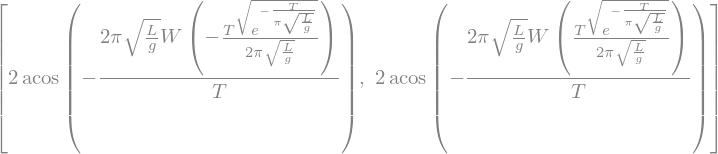

In [6]:
import sympy as sym
sym.init_printing()
#
T = sym.Symbol('T')
L = sym.Symbol('L')
g = sym.Symbol('g')
theta = sym.Symbol('theta')
#
sym.solve(T + 2*sym.pi*sym.sqrt(L/g)*sym.log(sym.cos(theta/2))/(1 - sym.cos(theta/2)), theta)

The $W$ referred to above is the Lambert $W$ function:

$$
{\theta _0} = 2\arccos \left( - {\frac{{2\pi }}{T}\sqrt {\frac{L}{g}} {\rm{LambertW}}\left( - {\frac{{T\exp \left[ -{\frac{T}{{2\pi \sqrt {\frac{L}{g}} }}} \right]}}{{2\pi \sqrt {\frac{L}{g}} }}} \right)} \right).
$$

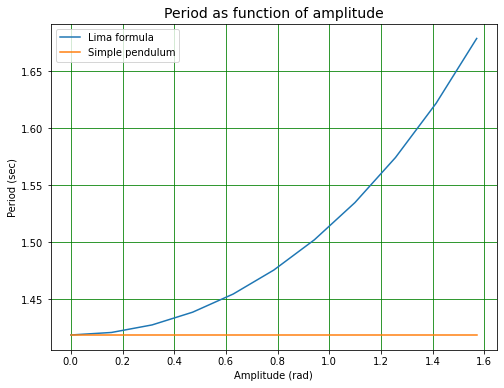

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def periodLima(L, thetaZero):
    if not hasattr(periodLima, "period.g"):
        periodLima.g = 9.81 # m/s^2
        periodLima.small = 1E-9
    #
    T = -2*np.pi*np.sqrt(L/periodLima.g)*np.log(np.cos(thetaZero/2))/(1 - np.cos(thetaZero/2))
    #
    return T
#
L = 0.5 # m
thetaBot = 0.0001
thetaTop = np.pi/2
nTheta = 10
thetaArr = np.linspace(thetaBot, thetaTop, nTheta + 1)
periodArr = periodLima(L, thetaArr)
#
plt.figure(figsize = (8, 6))
plt.title('Period as function of amplitude', fontsize = 14)
plt.xlabel('Amplitude (rad)')
plt.ylabel('Period (sec)')
plt.plot(thetaArr, periodArr, label = "Lima formula")
plt.plot(thetaArr, 2*np.pi*np.sqrt(L/periodLima.g)*np.ones(nTheta + 1), 
         label = "Simple pendulum")
plt.grid(color = 'g')
plt.legend()
plt.show()

<!-- Demo -->
Create Monte Carlo data of a series of measurements of a pendulum of a fixed length but with a range of amplitudes, including large values where the small angle approximation is not valid.
Create both small and large datasets, so the influence of statistical precision in making inferences can be investigated.

In [2]:
Debug = False
thetaBot = 0.1
thetaTop = np.pi/2
nTheta = 16
L = 0.5
thetaArr = np.linspace(thetaBot, thetaTop, nTheta) # rad
sigma = 0.5
exact = np.zeros(nTheta)
#
nMeas = 10
periodTabSm = np.zeros((nTheta, nMeas))
#
for n in range(0, nTheta):
    exact[n] = periodLima(L, thetaArr[n])
    periodTabSm[n, 0:nMeas] = np.random.normal(exact[n], scale = sigma, size = nMeas) # seconds
if Debug: print(periodTab)
#
np.savetxt("thetaTable.csv", thetaArr, delimiter = ',', )
np.savetxt("periodTableSmall.csv", periodTabSm, delimiter = ',')
#
nMeas = 1000
periodTabLg = np.zeros((nTheta, nMeas))
#
for n in range(0, nTheta):
    periodTabLg[n, 0:nMeas] = np.random.normal(exact[n], sigma, nMeas) # seconds
if Debug: print(periodTab)
#
np.savetxt("periodTableLarge.csv", periodTabLg, delimiter = ',')